In [5]:
import pandas as pd
import os.path
from core.util.math import compute_ft
import copy

from user_scripts.Timo.own.console_toolkit import Tk_file, Tk_string

Reload toolkit if changed

In [8]:
from importlib import reload  
reload(user_scripts.Timo.own.console_toolkit)
Tk_file

In [33]:
def load_pulsed_result(fname):
    return Tk_file.load_pulsed_result(fname)

def setup_clear_plots(n_plots):
    n_cur = qdplotlogic.number_of_plots
    for i in range(n_cur):
        n_cur_i = qdplotlogic.number_of_plots
        if n_cur_i >= 1:
            # removing without arguments seems buggy
            qdplotlogic.remove_plot(n_cur_i-1)
    
    for i in range(n_plots):
        qdplotlogic.add_plot()
        
def join_datapoints(mes, n=5):
    """
    calculates average over n datapoints.
    Eg. [0,1,2,3,4,5,6,7,8,9] -> [avg(0,1,2,3,4), avg(5,6,7,8,9)]
    """
    p_data = mes['data']
    mes_new = copy.deepcopy(mes)
    
    sub_arrays = []
    indices = np.arange(0, len(p_data), n)
    
    z = np.zeros((len(indices), 2))
    for i, idx in enumerate(indices):
        p_summed = p_data.iloc[idx:idx+n].sum()/n
        sub_arrays.append(p_summed)
        z[i,0] = p_summed.z1
        z[i,1] = p_summed.z2
    
    mes_new['data'] = pd.DataFrame(z, columns=['z1', 'z2'])
    
    # note: std is dropped here
    return mes_new
        
def plot_joined(idx_plot=0):
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    plt.plot(z1_avg[idx_plot,:], label=f'z1, t= {t_s[idx_plot]/60:.1f} min')
    plt.plot(z2_avg[idx_plot,:], label='z2')
    plt.legend()
    plt.subplot(122)
    plt.plot(delta_avg[idx_plot,:], label='delta')

    plt.legend()
    plt.tight_layout()
    plt.show()

# Load qudi pulsed data

In [36]:
#path = r"E:\Data\2021\09\20210903\PulsedMeasurement\ise_rfdd_1"
#path = r"E:\Data\2021\09\20210910\PulsedMeasurement\ise_ramsey_rddd_iseOffRes_3"
path = r"E:\Data\2021\11\20211125\PulsedMeasurement\ise_ramsey_rfdd_driftTest_1"
n_join_taus = 15

In [39]:
files = Tk_file.get_dir_items(path)
files_filter = Tk_string.filter_str(files, "pulsed_measurement.dat")

mes_avg = []
mes = []
for f in files_filter:
    p = load_pulsed_result(f)
    mes.append(p)
    mes_avg.append(join_datapoints(p, n=n_join_taus))

n_taus  = len(mes_avg[0]['data'].z1)
z1_avg = np.asarray([p['data'].z1 for p in mes_avg])
z2_avg = np.asarray([p['data'].z2 for p in mes_avg])
delta_avg = z2_avg-z1_avg
time = [p['date'] for p in mes_avg]
time = [t - time[0] for t in time]
t_s = np.asarray([t.total_seconds() for t in time])
n_ts = len(t_s)

z1_avg.shape

(33, 8)

## debug loading

In [334]:
files_filter[5]
[Tk_file.load_pulsed_result(files_filter[0])['date'], Tk_file.load_pulsed_result(files_filter[0])['file']]

[Timestamp('2021-09-10 19:31:12'), 'E:\\Data\\2021\\09\\20210910\\PulsedMeasurement\\ise_ramsey_rddd_iseOffRes_3/20210910-1931-12_ise+ramsey+rf_dd_i0000_pulsed_measurement.dat']

In [338]:

p = load_pulsed_result(files_filter[0])
p['file']
#p['data']
#join_datapoints(p, n=15)

'E:\\Data\\2021\\09\\20210910\\PulsedMeasurement\\ise_ramsey_rddd_iseOffRes_3/20210910-1931-12_ise+ramsey+rf_dd_i0000_pulsed_measurement.dat'

# Plotting

### Plot a few measurements

In [ ]:
plot_joined(0)
#plot_joined(25)
#plot_joined(200)
plot_joined(int(n_ts/2))
plot_joined(-1)

In [378]:
int(n_ts/2)

25

### 2d plot

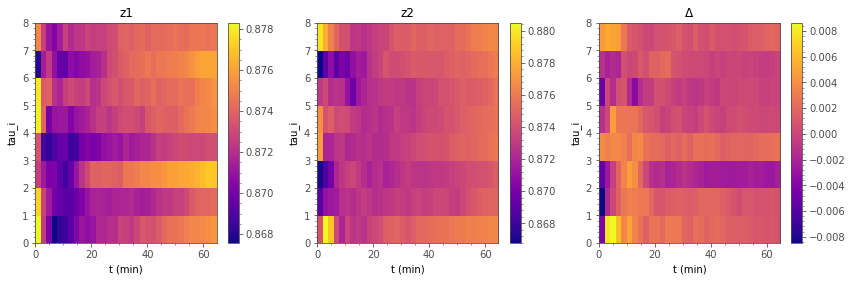

In [27]:
idx_zoom_end = 200

plt.figure(figsize=(12,4))

y_taus = np.arange(0, n_taus+1, 1)
ex = [t_s[0]/60, t_s[:idx_zoom_end][-1]/60, y_taus[0], y_taus[:idx_zoom_end][-1],]

plt.subplot(131)
plt.title("z1")
plt.imshow(np.transpose(z1_avg[:idx_zoom_end,:]),
           extent=ex,
           cmap='plasma', aspect='auto', origin='lower')
plt.xlabel("t (min)")
plt.ylabel("tau_i")
plt.colorbar()

plt.subplot(132)
plt.title("z2")
plt.imshow(np.transpose(z2_avg[:idx_zoom_end,:]),
           extent=ex,
           cmap='plasma', aspect='auto', origin='lower')
plt.xlabel("t (min)")
plt.ylabel("tau_i")
plt.colorbar()

plt.subplot(133)
plt.title(r"$\Delta$")
plt.imshow(np.transpose(delta_avg[:idx_zoom_end,:]),
           extent=ex,
           cmap='plasma', aspect='auto', origin='lower')
plt.xlabel("t (min)")
plt.ylabel("tau_i")
plt.colorbar()

plt.tight_layout()
plt.show()

In [536]:
y_taus

array([0, 1, 2, 3, 4, 5, 6, 7])

### Plot evolution of joined taus

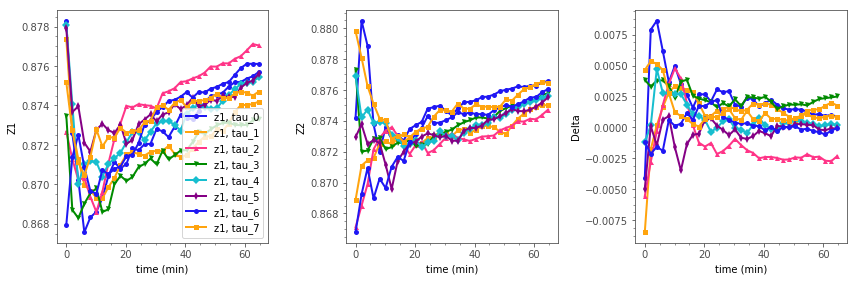

In [30]:
idx_zoom_end = 200#-1

plt.figure(figsize=(12,4))
plt.subplot(131)

for tau_idx in range(0, n_taus):
    plt.plot(t_s[:idx_zoom_end]/60, z1_avg[:idx_zoom_end,tau_idx], label=f'z1, tau_{tau_idx}')

plt.ylabel("Z1")
plt.xlabel("time (min)")
plt.legend()


plt.subplot(132)

for tau_idx in range(0, n_taus):
    plt.plot(t_s[:idx_zoom_end]/60, z2_avg[:idx_zoom_end,tau_idx], label=f'z2, tau_{tau_idx}')

plt.ylabel("Z2")
plt.xlabel("time (min)")
#plt.legend()


plt.subplot(133)


for tau_idx in range(0, n_taus):
    plt.plot(t_s[:idx_zoom_end]/60, delta_avg[:idx_zoom_end,tau_idx], label=f'delta, tau_{tau_idx}')

plt.ylabel("Delta")
plt.xlabel("time (min)")
#plt.legend()

plt.tight_layout()
plt.show()

single data file

In [53]:
"""
fname = r"E:\Data\2021\06\20210622\PulsedMeasurement" + "\\" \
        + "20210622-1350-12_ramsey_deer_pi_df=3MHz_two_deer_pi_OffRes_pulsed_measurement.dat"
"""

fname = os.path.normpath(files_filter[0])
p_data = load_pulsed_result(fname)
0

0

array([ 0,  5, 10, 15, 20, 25, 30, 35])

# Plot in qudi plot

Need to activate qdplotgui first!

## Alternating: z1,z2; Delta (z1-z2); FFT(Delta) trace

In [147]:
x = np.asarray(t_s)
z1 =  np.asarray(z1_avg[:,0])
z2 = np.asarray(z2_avg[:,1])
fft_x, fft_delta = compute_ft(x_val=x,
                          y_val=z1-z2)

qdplotlogic.set_data(x, z1)
qdplotlogic.set_data(x, z2, clear_old=False)

qdplotlogic.set_data(x, z1-z2, plot_index=1)

qdplotlogic.set_data(fft_x, fft_delta, plot_index=2)


0